In [8]:
import torch
from torchaudio.models import Conformer, RNNT, HuBERTPretrainModel
import models

In [22]:
import librosa
import os
import yt_dlp

def trim_audio(input_file, output_dir, segment_duration=10):
    # Load the audio file
    audio, sr = librosa.load(input_file, sr=None)
    
    # Calculate the number of segments
    num_segments = len(audio) // (sr * segment_duration)
    
    # Trim the audio into segments
    for i in range(num_segments):
        start_sample = i * sr * segment_duration
        end_sample = (i + 1) * sr * segment_duration
        segment = audio[start_sample:end_sample]
        
        # Save each segment as a separate file
        output_file = os.path.join(output_dir, f"segment_{i}.wav")
        librosa.output.write_wav(output_file, segment, sr)


def download_audio(url, output_template):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',  # You can change this to other formats like 'wav', 'm4a', etc.
            'preferredquality': '192',
        }],
        'outtmpl': output_template,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])


In [23]:
url = "https://www.youtube.com/watch?v=JJ1d46GqErg"
output_template = "audio"
download_audio(url, output_template)

output_dir = "segments"
os.makedirs(output_dir, exist_ok=True)
trim_audio(output_template, output_dir)

[youtube] Extracting URL: https://www.youtube.com/watch?v=JJ1d46GqErg
[youtube] JJ1d46GqErg: Downloading webpage
[youtube] JJ1d46GqErg: Downloading ios player API JSON
[youtube] JJ1d46GqErg: Downloading android player API JSON


[youtube] JJ1d46GqErg: Downloading android player API JSON


[youtube] JJ1d46GqErg: Downloading android player API JSON


[youtube] JJ1d46GqErg: Downloading android player API JSON


[youtube] JJ1d46GqErg: Downloading m3u8 information
[info] JJ1d46GqErg: Downloading 1 format(s): 251
[download] Destination: audio.mp3
[download] 100% of   27.89MiB in 00:00:02 at 10.78MiB/s    
[ExtractAudio] Destination: audio.mp3.mp3
Deleting original file audio.mp3 (pass -k to keep)


C:\Users\ihett\AppData\Local\Temp\ipykernel_13024\1410411434.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(input_file, sr=None)
c:\Users\ihett\Workspace\speech2text\.venv\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'audio.mp3'

In [9]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def get_total_params(model):
    return sum(p.numel() for p in model.parameters())

In [10]:
from datasets import load_dataset

dataset = load_dataset(
    "hf-internal-testing/librispeech_asr_dummy", "clean", split="validation"
)
dataset     

c:\Users\ihett\Workspace\speech2text\.venv\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for hf-internal-testing/librispeech_asr_dummy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hf-internal-testing/librispeech_asr_dummy
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
    num_rows: 73
})

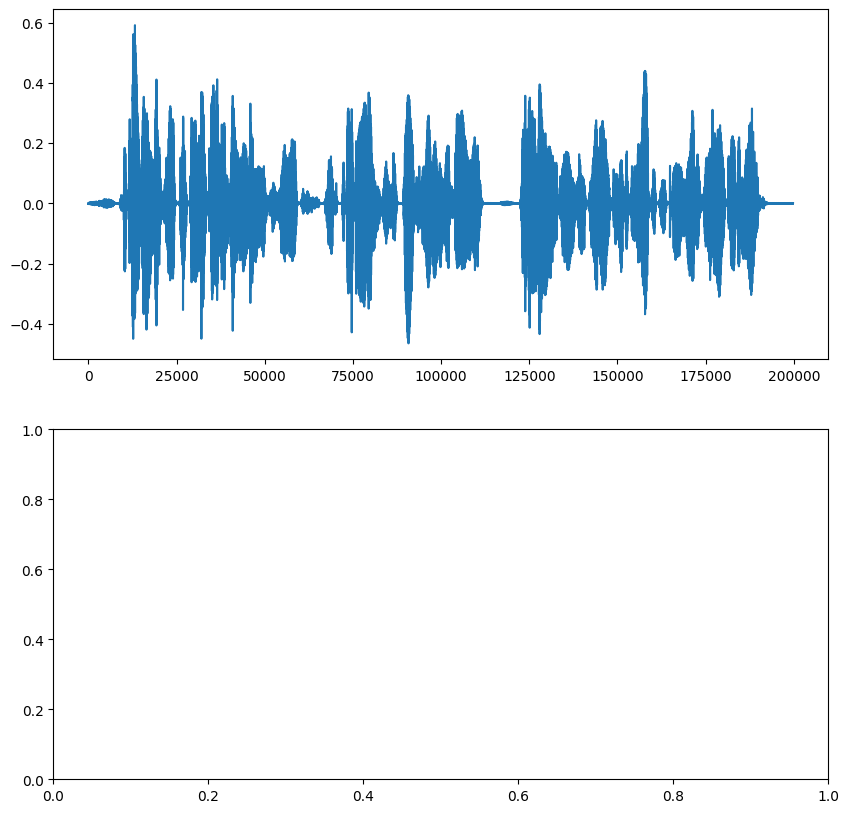

In [21]:
from IPython.display import Audio
from matplotlib import pyplot as plt

sample = dataset[2]

# print(sample["text"])
# Audio(sample["audio"]["array"], rate=sample["audio"]["sampling_rate"])
# sample #{"file", "audio{"file", "array", "sampling_rate"}, "text", "speaker_id","chapter_id", "id"}

sample["audio"]["array"].shape

fig,axs = plt.subplots(2,1, figsize=(10,10))
axs[0].plot(sample["audio"]["array"])


In [12]:
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-100h")

c:\Users\ihett\Workspace\speech2text\.venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ihett\.cache\huggingface\hub\models--facebook--wav2vec2-base-100h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at facebook/wav2vec2-base-100h were not used when initial

In [13]:
pipe(sample["audio"].copy())

{'text': 'HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMAUS AND ROSE BEEF LOOMING BEFORE US SIMALYIS DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND'}

In [14]:
import torch
from transformers import pipeline

device = "cuda:0" if torch.cuda.is_available() else "cpu"
pipe = pipeline(
    "automatic-speech-recognition", model="openai/whisper-base", device=device
)

c:\Users\ihett\Workspace\speech2text\.venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ihett\.cache\huggingface\hub\models--openai--whisper-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tu

In [15]:
pipe(sample["audio"], max_new_tokens=256)

c:\Users\ihett\Workspace\speech2text\.venv\Lib\site-packages\transformers\models\whisper\modeling_whisper.py:694: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


{'text': ' He tells us that at this festive season of the year, with Christmas and roast beef looming before us, similarly is drawn from eating and its results occur most readily to the mind.'}

In [16]:
model

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 384, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(384, 384, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 384)
      (layers): ModuleList(
        (0-3): 4 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=384, out_features=384, bias=False)
            (v_proj): Linear(in_features=384, out_features=384, bias=True)
            (q_proj): Linear(in_features=384, out_features=384, bias=True)
            (out_proj): Linear(in_features=384, out_features=384, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
          